In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
import pandas as pn

In [2]:
n_clusters = 2
max_iterations = 50
n_samples = 160

In [3]:
true_centroid = [[ rn.uniform(-10,10)  for i in range(0, n_clusters)], [rn.uniform(-10,10)  for i in range(0, n_clusters)]]

In [4]:
true_centroid

[[4.924659489578836, -6.788032901127226],
 [8.818519835919421, 1.428160432510401]]

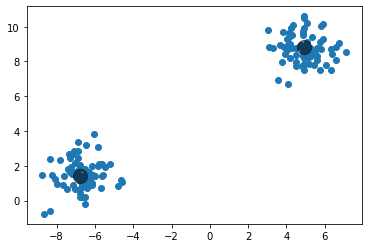

In [5]:

ndata = int(n_samples/n_clusters)
datax = []
datay = []
for j in range(n_clusters):  
    for i in range(0, ndata):  
        datax.append(true_centroid[0][j]+rn.random()*rn.uniform(-2.5,2.5) )
        datay.append(true_centroid[1][j]+rn.random()*rn.uniform(-2.5,2.5) )
data = [datax, datay]
plt.scatter(data[0][:], data[1][:])
plt.scatter(true_centroid[0][:], true_centroid[1][:], c='black', s=200, alpha=0.5)

In [23]:
centroides = [[rn.uniform(np.min(data[0]),np.max(data[0])),rn.uniform(np.min(data[1]),np.max(data[1]))] for i in range(n_clusters)]
centroides

[[6.353379982307377, 0.797784826233626],
 [-1.165485369533931, 7.847495368899235]]

In [24]:
clustersDic = {'s'+str(i): 1 for i in range(n_clusters)}
clustersDic = {'cluster'+str(i): [] for i in range(n_clusters)}
clustersDic

{'cluster0': [], 'cluster1': []}

### Mi codigo

In [126]:
def create_clusters():
    clustersDic = {'cluster'+str(i): [] for i in range(n_clusters)}
    centroides = [[rn.uniform(np.min(data[0]),np.max(data[0])), rn.uniform(np.min(data[1]),np.max(data[1]))] for i in range(n_clusters)]
    return clustersDic, centroides

In [128]:
clusters, centroids = create_clusters()
centroids

[[1.9818238107772554, 10.329153159714915],
 [-8.050934346243416, 3.61294917959025]]

In [40]:
def distance(point1, point2):
    distace = np.sqrt((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)
    return distace

In [118]:
def findCentroid(clusters):
    centroids = []
    for points in clusters:
        points = np.array(points).T
        centroids.append([np.sum(points[0])/len(points[0]), np.sum(points[0])/len(points[0])])
        # centroids.append(len(points[0]))
    return centroids


In [131]:
def update_cluster(centroids):
    clustersDis = [[] for i in range(n_clusters)]
    for i in range(len(data[0])):
        dis = [distance([data[0][i],data[1][i]], centroids[j]) for j in range(n_clusters)]
        minDist = dis.index(np.min(dis))
        clustersDis[minDist].append([data[0][i],data[1][i]])
        clustersDis = np.array(clustersDis)
    centroids = findCentroid(clustersDis)
    return clustersDis, centroids

C:\Users\baruc\AppData\Local\Temp\ipykernel_3580\4039889107.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clustersDis = np.array(clustersDis)


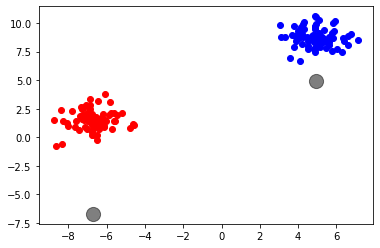

In [135]:
for i in range(max_iterations):
    clusters, centroids = update_cluster(centroids)
for point in clusters[0]:
    plt.plot(point[0],point[1],'o',color = 'blue')
for point in clusters[1]:
    plt.plot(point[0],point[1],'o',color = 'red')
plt.scatter(centroids[0][0], centroids[0][1], c='black', s=200, alpha=0.5)
plt.scatter(centroids[1][0], centroids[1][1], c='black', s=200, alpha=0.5)

In [101]:
np.array(clusterss[1]).T[0][0]

6.311816052182424

In [116]:

def find_close_cluster(point):
    for cluster in clusters:

80

### Pseudocodigo 1

In [ ]:
mux = []
muy = []
for i in range(n_clusters):
    mux.append(rn.random()*rn.uniform(-10,10) )
    muy.append(rn.random()*rn.uniform(-10,10) )
mu = [mux, muy]
mu


[[1.14505812170436, -0.9453566087217793, -0.10078900668084452],
 [6.25769216998484, -2.501929800089469, 4.7260262506846615]]

In [ ]:
k = np.ones(n_clusters)
r = np.zeros((n_samples,n_clusters))
for j in range(max_iterations):
    # definimos los vectores entre cada punto
    for i in range(len(data[0])):
        for cluster in range(n_clusters):
            vec = np.sqrt(data[0][i]**2 + data[1][i]**2)
            muVec = np.sqrt(mu[0][cluster]**2 + mu[1][cluster]**2)
            k = np.sqrt(true_centroid[0][cluster]**2+true_centroid[1][cluster]**2)
            if k >= np.min(np.abs(vec-muVec)):
                r[i][cluster] = 1
    for cluster in range(n_clusters):
        suma11, suma12, suma21, suma22 = 0, 0, 0, 0
        for i in range(len(data[0])):
            suma11 += (r[i][cluster]*data[0][i])
            suma12 += (r[i][cluster])
            suma21 += (r[i][cluster]*data[1][i])
            suma22 += (r[i][cluster])
        mu[0][cluster] = suma11/suma12
        mu[1][cluster] = suma21/suma22

In [ ]:
mu

[[-3.19906536630232, -0.7898162944054988, -0.47612233828735884],
 [0.7469419232189899, -0.7934366070104272, -0.9259272579413395]]

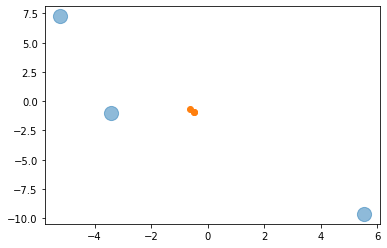

In [ ]:
plt.scatter(true_centroid[0][:], true_centroid[1][:], s=200, alpha=0.5)
plt.scatter(mu[0][:],mu[1][:])